## SAMARTH MOTKA
## 202311023
## 23/08/23
## FOML-Assignment-2-Linear regression

Here we will be referencing ***X = Income*** and ***Y = Balance*** respectively.


In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [65]:
train = pd.read_csv('/content/drive/MyDrive/foml-linear-regression-data/train.csv')
train


,Income,Balance
0,0.550798,5.651202
1,0.708148,7.321263
2,0.290905,5.167304
3,0.510828,5.609367
4,0.892947,9.406379
5,0.896293,9.379439
6,0.125585,2.734997
7,0.207243,4.876649
8,0.051467,3.584138
9,0.440810,5.437239


In [66]:
test = pd.read_csv('/content/drive/MyDrive/foml-linear-regression-data/test.csv')
test

,Income,Balance
0,0.967030,9.675083
1,0.547232,6.293266
2,0.972684,9.730614
3,0.714816,7.474346
4,0.697729,7.342933
5,0.216089,4.619033
6,0.976274,9.765597
7,0.006230,4.012784
8,0.252982,4.762698
9,0.434792,5.626166


In [67]:
train_x = np.array(train["Income"])
train_y = np.array(train["Balance"])
test_x = np.array(test['Income'])
test_y = np.array(test['Balance'])

Now find all the respective values to get the value of B0 and B1.
u = [β1 β0]   = (AᵀA)⁻¹(AᵀY)


In [68]:
A=[]
for i in range(len(train_x)):
  list1 = [train_x[i],1]
  A.append(list1)

Aᵀ = np.transpose(A)



* r1 = (AᵀA)
* r2 = (AᵀY)



In [69]:

r1 = np.dot(Aᵀ,A)
r1_inv = np.linalg.inv(r1)
r1_inv

array([[ 1.2177048 , -0.56927991],
       [-0.56927991,  0.36613973]])

In [70]:
r2 = np.dot(Aᵀ,train_y)
b1,b0 = np.dot(r1_inv,r2)

print(f"The value of B1 is {b1} and B0 is {b0}")


The value of B1 is 6.997123062019306 and B0 is 2.64562587541063


Prediciting the values for train data

In [71]:
predicted_y1=[]
for i in train_x:
  predicted_y1.append((b0) + b1*(i))
predicted_y1


[6.49962726372474,
 7.600624577533478,
 4.681123959767357,
 6.219952254935828,
 8.893685922271583,
 8.9170982960371,
 3.5243595751543246,
 4.0957306501526975,
 3.0057468080435776,
 5.730027692379361]

Predicting the values for test data

In [72]:
predicted_y=[]
for i in test_x:
  predicted_y.append((b0) + b1*(i))

In [73]:
predicted_y


[9.41205379007516,
 6.47467552288558,
 9.451615523867817,
 7.6472813941110225,
 7.527721552350299,
 4.15762720075932,
 9.476735195660467,
 2.6892179520870103,
 4.415772061886399,
 5.6879190057921285,
 8.099064638856422,
 4.0288521479259165,
 8.684094098071856,
 9.526603691723476,
 3.792048512137997,
 6.825245382538871,
 2.7085020232459356,
 5.350510734618496,
 2.9546188298294025,
 9.339444644060585]

Ploting  the actual target variable and  predicted variable for train set as well as test set.

Below plot shows the predicted values of y vs in training data

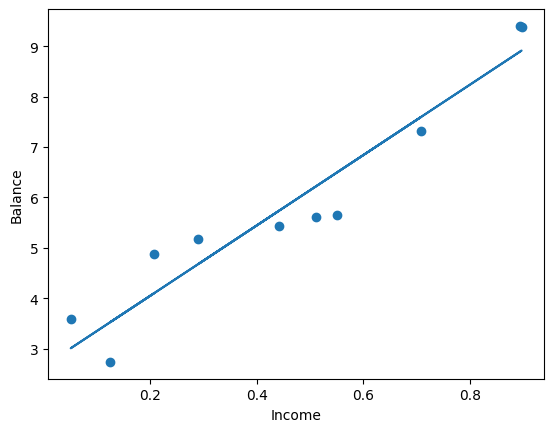

In [74]:
plt.scatter(train_x,train_y)
plt.plot(train_x,predicted_y1)
plt.xlabel("Income")
plt.ylabel("Balance")
plt.show()

Below plot shows the predicted values of y in testing data

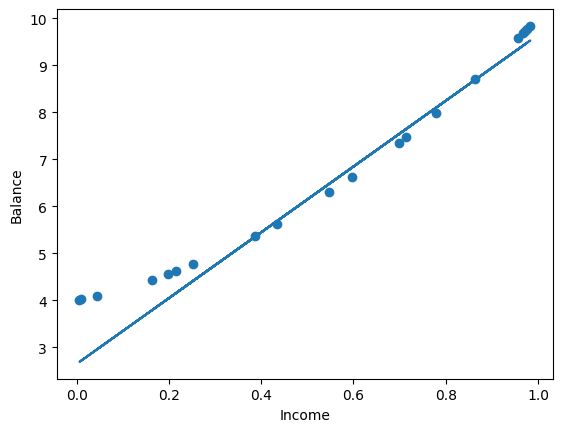

In [75]:
plt.scatter(test_x,test_y)
plt.plot(test_x,predicted_y)
plt.xlabel("Income")
plt.ylabel("Balance")
plt.show()

# RMSE(Root Man Square Error) values for train and test are given below:

In [76]:
RMSEtrain = 0
for i in range(len(predicted_y1)):
  RMSEtrain += ((predicted_y1[i]-train_y[i])**2)
RMSEtrain = (RMSEtrain/len(predicted_y1))**0.5
print("The RMSE of train data is ",RMSEtrain)

The RMSE of train data is  0.5947146505834614


In [77]:
RMSEtest = 0
for i in range(len(predicted_y)):
  RMSEtest += ((predicted_y[i]-test_y[i])**2)
RMSEtest = (RMSEtest/len(predicted_y))**0.5
print("The RMSE of test data is ",RMSEtest)

The RMSE of test data is  0.5625799860234549


# SSE(Sum of Square Error) values for train and test are given below:

In [78]:
SSEtrain = 0
for i in range(len(predicted_y1)):
  SSEtrain += ((predicted_y1[i]-train_y[i])**2)
print("The SSE of train data is ",SSEtrain)

The SSE of train data is  3.5368551561860855


In [79]:
SSEtest = 0
for i in range(len(predicted_y)):
  SSEtest += ((predicted_y[i]-test_y[i])**2)
print("The SSE of test data is ",SSEtest)

The SSE of test data is  6.329924813483014


# NMSE(Normalized Mean Square Error) values for train and test are given below:

In [80]:
meantrain = np.mean(train_y)

NMSEtrain = 0
SSTtrain =0
for i in range(len(predicted_y1)):
  SSTtrain += ((train_y[i]-meantrain)**2)

NMSEtrain += SSEtrain/SSTtrain
print("The NMSE of train data is ",NMSEtrain)

The NMSE of train data is  0.08085455752806696


In [81]:
meantest = np.mean(test_y)
NMSEtest = 0
SSTtest =0
for i in range(len(predicted_y)):
  SSTtest += ((test_y[i]-meantest)**2)

NMSEtest += SSEtest/SSTtest
print("The NMSE of test data is ",NMSEtest)

The NMSE of test data is  0.06711648024855073


# MAE(Mean absolute Error) values for train and test are given below:

In [82]:
MAEtrain = 0
for i in range(len(predicted_y1)):
  MAEtrain += abs((predicted_y1[i]-train_y[i]))
MAEtrain = (MAEtrain/len(predicted_y1))
print("The MAE of train data is ",MAEtrain)

The MAE of train data is  0.5641046727455415


In [83]:
MAEtest = 0
for i in range(len(predicted_y)):
  MAEtest+= abs((predicted_y[i]-test_y[i]))
MAEtest = (MAEtest/len(predicted_y))
print("The MAE of test data is ",MAEtest)

The MAE of test data is  0.4040993045292243


# MAPE(Mean Absolute Precentage of Error) values for train and test are given below:

In [84]:
MAPEtrain = 0
for i in range(len(predicted_y1)):
  MAPEtrain += abs(((predicted_y1[i]-train_y[i]))/train_y[i])
MAPEtrain = (MAPEtrain/len(predicted_y1))*100
print("The MAPE of train data is ",MAPEtrain)

The MAPE of train data is  11.589997549008832


In [85]:
MAPEtest = 0
for i in range(len(predicted_y)):
  MAPEtest+= abs(((predicted_y[i]-test_y[i]))/test_y[i])
MAPEtest = (MAPEtest/len(predicted_y))*100
print("The MAPE of test data is ",MAPEtest)

The MAPE of test data is  8.238459707938958


# R^2 values for train and test are given below:

In [88]:
rtrain = 1 - NMSEtrain
print("The R^2 of train data is ",rtrain)

The R^2 of train data is  0.9191454424719331


In [87]:
rtest = 1 - NMSEtest
print("The R^2 of test data is ",rtest)

The R^2 of test data is  0.9328835197514492
